## GeoDataFrame - Geospatial Data with Points and MultiPolygons

The GeoDataFrame contains geospatial data with two geometries: Points and MultiPolygons. It is created using the Geopandas library, which extends the functionality of Pandas to handle spatial data.

### The DataFrame

The DataFrame component of the GeoDataFrame holds tabular data. It has two columns: 'col1' and 'geometry'. The 'col1' column contains names or labels associated with each spatial feature, and the 'geometry' column stores the corresponding geometric objects.

### Points

#### Data:

| col1  | geometry               |
|-------|------------------------|
| name1 | POINT (1.0 2.0)        |
| name2 | POINT (2.0 1.0)        |

#### Explanation:

The 'geometry' column contains two Point objects, which represent spatial locations. Each row corresponds to a unique spatial feature (name1 and name2), and the Point geometry stores the coordinates (latitude and longitude) of each location.

The first row represents 'name1' with the Point geometry at coordinates (1.0, 2.0). This means 'name1' is located at latitude 1.0 and longitude 2.0.

The second row represents 'name2' with the Point geometry at coordinates (2.0, 1.0). This means 'name2' is located at latitude 2.0 and longitude 1.0.

### MultiPolygons

#### Data:

| name     | geometry                                          |
|----------|---------------------------------------------------|
| polygon1 | MULTIPOLYGON (((4.0 4.0, 4.87939 3.60705, ...)))  |
| polygon2 | MULTIPOLYGON (((5.0 5.0, 5.63205 4.36602, ...)))  |

#### Explanation:

The 'geometry' column contains two MultiPolygon objects, which represent complex spatial shapes with multiple polygons. Each row corresponds to a unique spatial feature ('polygon1' and 'polygon2'), and the MultiPolygon geometry stores the coordinates of the vertices that define the shapes.

The first row represents 'polygon1' with the MultiPolygon geometry defined by multiple vertices forming a complex shape.

The second row represents 'polygon2' with the MultiPolygon geometry defined by a different set of vertices forming another complex shape.

### Conclusion

The GeoDataFrame contains both Point and MultiPolygon geometries, allowing for the representation of diverse geospatial features. The DataFrame stores the associated attributes, while the geometry column holds the spatial information for each feature. This makes the GeoDataFrame a powerful data structure for performing spatial analysis and visualization tasks in Python.


In [5]:
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads
from shapely.geometry import Point, MultiPolygon

# Sample data as a DataFrame
data = {
    'col1': ['name1', 'name2'],
    'geometry': ['POINT (1 2)', 'POINT (2 1)'],
}

df = pd.DataFrame(data)

# Convert WKT to Point geometries
df['geometry'] = df['geometry'].apply(lambda x: loads(x))

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

gdf


,col1,geometry
0,name1,POINT (1.00000 2.00000)
1,name2,POINT (2.00000 1.00000)


## Shape file for the GIS dataset

A shapefile (SHP) is a vector data storage format for storing the location, shape, and attributes of geographic features. The format was developed by ESRI and is sometimes referred to as 'an ESRI shapefile'. Shapefiles are the most common GIS file type and are now accepted as an industry-wide format.

The shapefile format defines the geometry and attributes of geographically referenced features in three or more files with specific file extensions that should be stored in the same project workspace.

There are three mandatory files:

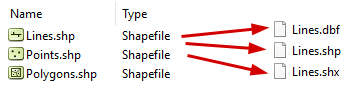

.shp (Shapefile) is a mandatory Esri file that gives features their geometry. Every shapefile has its own .shp file that represent spatial vector data. For example, it could be points, lines and polygons in a map.

.shx (Shapefile index) are mandatory Esri and AutoCAD shape index position. This type of file is used to search forward and backwards.

.dbf (Database file) is a standard database file used to store attribute data and object IDs. A .dbf file is mandatory for shape files. You can open .DBF files in Microsoft Access or Excel.

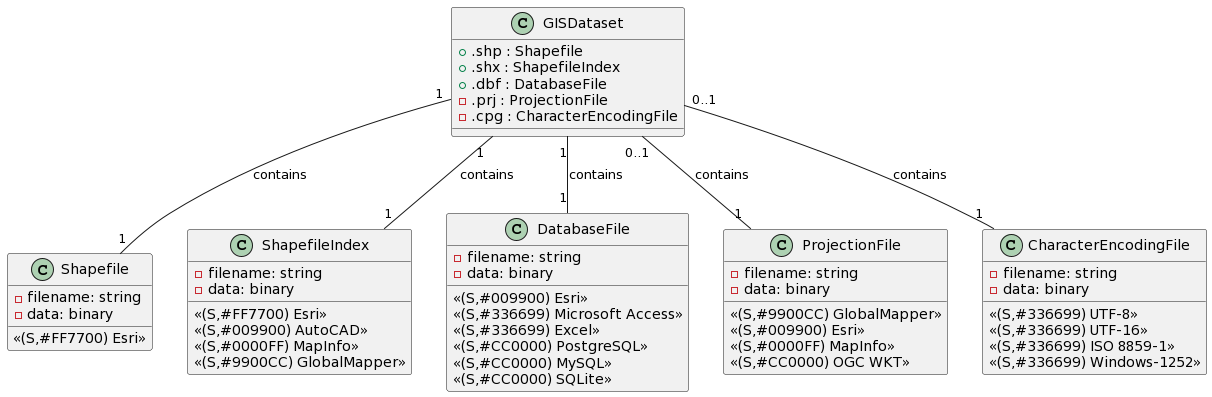

### Other files can be included

.prj (Projection file): Defines the coordinate system and spatial reference information for accurate mapping of geographic features in a GIS dataset.

.cpg (Character encoding file): A CPG file is a plain text file that specifies the character encoding used for attribute data in a shapefile (SHP).

## Methods & Properties

In [7]:
# Example of geodataframe methods
gdf = gpd.read_file("./japan-prefecture-boundaries/japan-prefecture-boundaries.shp")

In [9]:
gdf.tail()

,prefecture,geometry
42,Toyama,"POLYGON ((137.63779 36.98037, 137.64798 36.969..."
43,Wakayama,"MULTIPOLYGON (((135.82077 33.45090, 135.82062 ..."
44,Yamagata,"MULTIPOLYGON (((139.68417 38.72306, 139.68333 ..."
45,Yamaguchi,"MULTIPOLYGON (((132.48804 33.73760, 132.48842 ..."
46,Yamanashi,"POLYGON ((138.46316 35.90044, 138.47263 35.894..."


In [10]:
gdf.head()

,prefecture,geometry
0,Aichi,"MULTIPOLYGON (((137.09523 34.65330, 137.09546 ..."
1,Akita,"MULTIPOLYGON (((139.55725 39.20330, 139.55765 ..."
2,Aomori,"MULTIPOLYGON (((141.39860 40.92472, 141.39806 ..."
3,Chiba,"MULTIPOLYGON (((139.82488 34.98967, 139.82434 ..."
4,Ehime,"MULTIPOLYGON (((132.55859 32.91224, 132.55904 ..."


<Axes: >

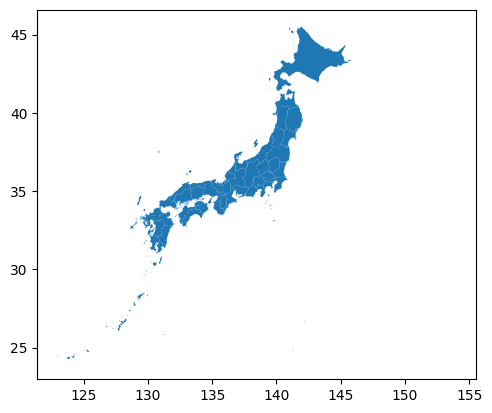

In [11]:
gdf.plot()

#### Other methods

to_file(): Exports the GeoDataFrame to a file format (e.g., shapefile, GeoJSON, etc.).
to_crs(): Projects/transforms the GeoDataFrame to a new coordinate reference system (CRS).
buffer(): Creates a buffer around the geometries in the GeoDataFrame.
dissolve(): Combines polygons based on a specified attribute.
distance(): Calculates the distance between geometries in the GeoDataFrame.
within(), intersects(), contains(), etc.: Spatial relationship queries.
apply(): Applies a function to each row in the GeoDataFrame.
merge(), join(): Merges or joins two GeoDataFrames based on a common column.

In [12]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
gdf.bounds

,minx,miny,maxx,maxy
0,136.670884,34.578380,137.831023,35.421760
1,139.539046,38.871681,140.997436,40.507873
2,139.334717,40.215247,141.684739,41.555794
3,139.740005,34.898888,140.870713,36.100227
4,132.012923,32.897499,133.695053,34.315372
5,135.452438,35.341751,136.834474,36.295143
6,130.032227,32.999429,131.190552,34.250278
7,139.168044,36.792610,141.046189,37.973683
8,136.278930,35.144585,137.653823,36.462584
9,138.400955,35.986190,139.662475,37.055527


In [14]:
gdf.shape

(47, 2)

In [15]:
gdf.values

array([['Aichi',
        <MULTIPOLYGON (((137.095 34.653, 137.095 34.653, 137.095 34.652, 137.096 34....>],
       ['Akita',
        <MULTIPOLYGON (((139.557 39.203, 139.558 39.203, 139.558 39.203, 139.559 39....>],
       ['Aomori',
        <MULTIPOLYGON (((141.399 40.925, 141.398 40.924, 141.398 40.924, 141.397 40....>],
       ['Chiba',
        <MULTIPOLYGON (((139.825 34.99, 139.824 34.99, 139.824 34.99, 139.823 34.99,...>],
       ['Ehime',
        <MULTIPOLYGON (((132.559 32.912, 132.559 32.912, 132.56 32.912, 132.56 32.91...>],
       ['Fukui',
        <MULTIPOLYGON (((136.042 35.734, 136.042 35.734, 136.041 35.734, 136.041 35....>],
       ['Fukuoka',
        <MULTIPOLYGON (((130.07 33.507, 130.069 33.507, 130.069 33.507, 130.069 33.5...>],
       ['Fukushima',
        <MULTIPOLYGON (((140.796 36.857, 140.796 36.857, 140.795 36.857, 140.795 36....>],
       ['Gifu',
        <POLYGON ((137.29 36.458, 137.301 36.455, 137.305 36.457, 137.312 36.46, 137...>],
       ['Gunma',
     

In [16]:
gdf.size

94

In [17]:
gdf.geometry

0     MULTIPOLYGON (((137.09523 34.65330, 137.09546 ...
1     MULTIPOLYGON (((139.55725 39.20330, 139.55765 ...
2     MULTIPOLYGON (((141.39860 40.92472, 141.39806 ...
3     MULTIPOLYGON (((139.82488 34.98967, 139.82434 ...
4     MULTIPOLYGON (((132.55859 32.91224, 132.55904 ...
5     MULTIPOLYGON (((136.04195 35.73417, 136.04167 ...
6     MULTIPOLYGON (((130.06972 33.50667, 130.06917 ...
7     MULTIPOLYGON (((140.79611 36.85750, 140.79611 ...
8     POLYGON ((137.29045 36.45821, 137.30113 36.455...
9     POLYGON ((139.18037 36.98150, 139.17883 36.971...
10    MULTIPOLYGON (((132.52170 34.03893, 132.52147 ...
11    MULTIPOLYGON (((140.09169 41.41886, 140.09129 ...
12    MULTIPOLYGON (((134.82297 34.17980, 134.82336 ...
13    MULTIPOLYGON (((140.69528 35.92944, 140.69444 ...
14    MULTIPOLYGON (((136.72093 37.05970, 136.72015 ...
15    MULTIPOLYGON (((141.72762 39.03545, 141.72708 ...
16    MULTIPOLYGON (((133.53694 34.12017, 133.53493 ...
17    MULTIPOLYGON (((128.45164 27.05461, 128.45

In a GeoDataFrame from geopandas, the "geometry" column can store different types of geometric objects representing spatial features. The supported geometry types include:

- Point: A single point in space, represented by its x, y (and optionally z) coordinates.
- LineString: A sequence of connected points, representing a continuous line.
- Polygon: A closed ring of LineString(s), representing an area enclosed by the boundary.
- MultiPoint: A collection of multiple points.
- MultiLineString: A collection of multiple LineString(s).
- MultiPolygon: A collection of multiple Polygon(s).
- GeometryCollection: A heterogeneous collection of any combination of the above geometries.

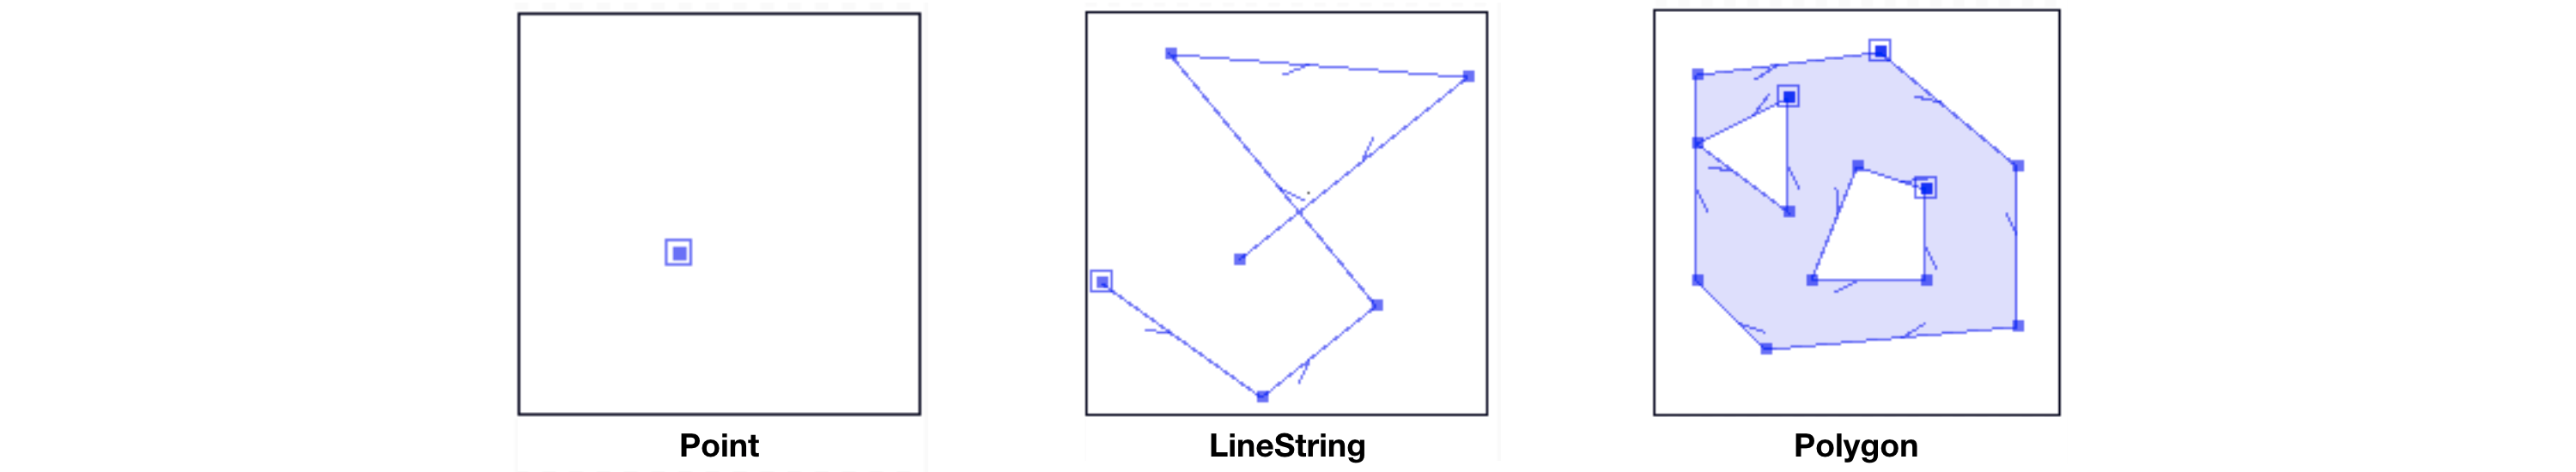